# Prueba Data Science

Iniciamos  importando las librerias necesarias

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
datos = "sales_data_sample.xlsx"

Importamos los datos

In [3]:
det = pd.read_excel(datos, sheet_name="DetalleOrden", header=0)
pro = pd.read_excel(datos, sheet_name="Producto", header=0)
cli = pd.read_excel(datos, sheet_name="Cliente", header=0)
orden = pd.read_excel(datos, sheet_name="Orden", header=0)

In [4]:
print('Dimensiones DetalleOrden',det.shape)
print('Dimensiones Producto',pro.shape)
print('Dimensiones Cliente',cli.shape)
print('Dimensiones Orden',orden.shape)

Dimensiones DetalleOrden (2823, 8)
Dimensiones Producto (109, 3)
Dimensiones Cliente (92, 12)
Dimensiones Orden (307, 7)


In [5]:
det.head()

,ORDERNUMBER,ID_Cliente,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,PRODUCTCODE,DEALSIZE
0,10107,C046,30,95.70,2,2871.00,S10_1678,Small
1,10121,C068,34,81.35,5,2765.90,S10_1678,Small
2,10134,C048,41,94.74,2,3884.34,S10_1678,Medium
3,10145,C087,45,83.26,6,3746.70,S10_1678,Medium
4,10159,C024,49,100.00,14,5205.27,S10_1678,Medium


In [6]:
det.drop('ORDERLINENUMBER', axis=1, inplace=True)

In [7]:
pro.head()

,PRODUCTCODE,PRODUCTLINE,MSRP
0,S10_1678,Motorcycles,95
1,S10_1949,Classic Cars,214
2,S10_2016,Motorcycles,118
3,S10_4698,Motorcycles,193
4,S10_4757,Classic Cars,136


In [8]:
cli.head()

,ID_Cliente,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME
0,C001,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette
1,C002,Amica Models & Co.,011-4988555,Via Monte Bianco 34,NaN,Torino,NaN,10100,Italy,EMEA,Accorti,Paolo
2,C003,"Anna's Decorations, Ltd",299368555,201 Miller Street,Level 15,North Sydney,NSW,2060,Australia,APAC,O'Hara,Anna
3,C004,Atelier graphique,40.32.2555,"54, rue Royale",NaN,Nantes,NaN,44000,France,EMEA,Schmitt,Carine
4,C005,"Australian Collectables, Ltd",61-9-3844-6555,7 Allen Street,NaN,Glen Waverly,Victoria,3150,Australia,APAC,Connery,Sean


In [9]:
cli.drop(['PHONE','ADDRESSLINE1','ADDRESSLINE2','CITY','STATE','POSTALCODE','TERRITORY','CONTACTLASTNAME','CONTACTFIRSTNAME'],axis=1, inplace=True)

In [10]:
orden.head()

,ORDERNUMBER,ORDERDATE,DAY_ID,QTR_ID,MONTH_ID,YEAR_ID,STATUS
0,10100,1/6/2003 0:00,6,1,1,2003,Shipped
1,10101,1/9/2003 0:00,9,1,1,2003,Shipped
2,10102,1/10/2003 0:00,10,1,1,2003,Shipped
3,10103,1/29/2003 0:00,29,1,1,2003,Shipped
4,10104,1/31/2003 0:00,31,1,1,2003,Shipped


In [11]:
orden.drop(['DAY_ID','QTR_ID','MONTH_ID','YEAR_ID'], axis=1, inplace=True)

In [12]:
print('Tipos DetalleOrden',det.dtypes)
print('Tipos Producto',pro.dtypes)
print('Tipos Cliente',cli.dtypes)
print('Tipos Orden',orden.dtypes)

Tipos DetalleOrden ORDERNUMBER          int64
ID_Cliente          object
QUANTITYORDERED      int64
PRICEEACH          float64
SALES              float64
PRODUCTCODE         object
DEALSIZE            object
dtype: object
Tipos Producto PRODUCTCODE    object
PRODUCTLINE    object
MSRP            int64
dtype: object
Tipos Cliente ID_Cliente      object
CUSTOMERNAME    object
COUNTRY         object
dtype: object
Tipos Orden ORDERNUMBER     int64
ORDERDATE      object
STATUS         object
dtype: object


In [13]:
det['ORDERNUMBER'] = det['ORDERNUMBER'].astype(str)

In [14]:
orden['ORDERNUMBER'] = orden['ORDERNUMBER'].astype(str)

In [15]:
orden['ORDERDATE'] = pd.to_datetime(orden['ORDERDATE'])

In [16]:
print('Tipos DetalleOrden',det.dtypes)
print('Tipos Producto',pro.dtypes)
print('Tipos Cliente',cli.dtypes)
print('Tipos Orden',orden.dtypes)

Tipos DetalleOrden ORDERNUMBER         object
ID_Cliente          object
QUANTITYORDERED      int64
PRICEEACH          float64
SALES              float64
PRODUCTCODE         object
DEALSIZE            object
dtype: object
Tipos Producto PRODUCTCODE    object
PRODUCTLINE    object
MSRP            int64
dtype: object
Tipos Cliente ID_Cliente      object
CUSTOMERNAME    object
COUNTRY         object
dtype: object
Tipos Orden ORDERNUMBER            object
ORDERDATE      datetime64[ns]
STATUS                 object
dtype: object


In [17]:
orden.head()

,ORDERNUMBER,ORDERDATE,STATUS
0,10100,2003-01-06,Shipped
1,10101,2003-01-09,Shipped
2,10102,2003-01-10,Shipped
3,10103,2003-01-29,Shipped
4,10104,2003-01-31,Shipped


In [18]:
df = pd.merge(det,cli,on='ID_Cliente',how='outer')
df = pd.merge(df,pro,on='PRODUCTCODE',how='outer')
df = pd.merge(df,orden,on='ORDERNUMBER',how='outer')
df.head()

,ORDERNUMBER,ID_Cliente,QUANTITYORDERED,PRICEEACH,SALES,PRODUCTCODE,DEALSIZE,CUSTOMERNAME,COUNTRY,PRODUCTLINE,MSRP,ORDERDATE,STATUS
0,10107,C046,30,95.70,2871.00,S10_1678,Small,Land of Toys Inc.,USA,Motorcycles,95,2003-02-24,Shipped
1,10107,C046,39,99.91,3896.49,S10_2016,Medium,Land of Toys Inc.,USA,Motorcycles,118,2003-02-24,Shipped
2,10107,C046,27,100.00,6065.55,S10_4698,Medium,Land of Toys Inc.,USA,Motorcycles,193,2003-02-24,Shipped
3,10107,C046,21,100.00,3036.60,S12_2823,Medium,Land of Toys Inc.,USA,Motorcycles,150,2003-02-24,Shipped
4,10107,C046,29,70.87,2055.23,S18_2625,Small,Land of Toys Inc.,USA,Motorcycles,60,2003-02-24,Shipped


Generamos el dataframe que usaremos para el analisis

In [19]:
df.shape

(2823, 13)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2823 entries, 0 to 2822
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2823 non-null   object        
 1   ID_Cliente       2823 non-null   object        
 2   QUANTITYORDERED  2823 non-null   int64         
 3   PRICEEACH        2823 non-null   float64       
 4   SALES            2823 non-null   float64       
 5   PRODUCTCODE      2823 non-null   object        
 6   DEALSIZE         2823 non-null   object        
 7   CUSTOMERNAME     2823 non-null   object        
 8   COUNTRY          2823 non-null   object        
 9   PRODUCTLINE      2823 non-null   object        
 10  MSRP             2823 non-null   int64         
 11  ORDERDATE        2823 non-null   datetime64[ns]
 12  STATUS           2823 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 308.8+ KB


Verificamos que no  hay valores nulos, y que el Dtype es el correcto

In [21]:
df.describe(include='all')

<ipython-input-21-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,ORDERNUMBER,ID_Cliente,QUANTITYORDERED,PRICEEACH,SALES,PRODUCTCODE,DEALSIZE,CUSTOMERNAME,COUNTRY,PRODUCTLINE,MSRP,ORDERDATE,STATUS
count,2823,2823,2823.000000,2823.000000,2823.000000,2823,2823,2823,2823,2823,2823.000000,2823,2823
unique,307,92,NaN,NaN,NaN,109,3,92,19,7,NaN,252,6
top,10159,C034,NaN,NaN,NaN,S18_3232,Medium,Euro Shopping Channel,USA,Classic Cars,NaN,2003-11-14 00:00:00,Shipped
freq,18,259,NaN,NaN,NaN,52,1384,259,1004,967,NaN,38,2617
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-01-06 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-05-31 00:00:00,NaN
mean,NaN,NaN,35.092809,83.658544,3553.889072,NaN,NaN,NaN,NaN,NaN,100.715551,NaN,NaN
std,NaN,NaN,9.741443,20.174277,1841.865106,NaN,NaN,NaN,NaN,NaN,40.187912,NaN,NaN
min,NaN,NaN,6.000000,26.880000,482.130000,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN
25%,NaN,NaN,27.000000,68.860000,2203.430000,NaN,NaN,NaN,NaN,NaN,68.000000,NaN,NaN


# 2. Segmentación de Clientes RFM

In [22]:
dfRFM1 = df[['CUSTOMERNAME','ORDERNUMBER']].drop_duplicates(subset=['ORDERNUMBER'])
dfRFM1 = dfRFM1.groupby('CUSTOMERNAME').count()
dfRFM1.head()

,ORDERNUMBER
CUSTOMERNAME,
"AV Stores, Co.",3
Alpha Cognac,3
Amica Models & Co.,2
"Anna's Decorations, Ltd",4
Atelier graphique,3


In [23]:
dfRFM2 = df[['CUSTOMERNAME','SALES']].groupby('CUSTOMERNAME').sum()
dfRFM2

,SALES
CUSTOMERNAME,
"AV Stores, Co.",157807.81
Alpha Cognac,70488.44
Amica Models & Co.,94117.26
"Anna's Decorations, Ltd",153996.13
Atelier graphique,24179.96
...,...
"Vida Sport, Ltd",117713.56
Vitachrome Inc.,88041.26
"Volvo Model Replicas, Co",75754.88


In [24]:
from datetime import date, timedelta
dfRFM3 = df[['CUSTOMERNAME','ORDERNUMBER', 'ORDERDATE']].drop_duplicates(subset=['ORDERNUMBER'])
dfRFM3['RECENCIA'] =  (pd.to_datetime('10/22/2005 0:00') - dfRFM3['ORDERDATE']).dt.days
dfRFM3

,CUSTOMERNAME,ORDERNUMBER,ORDERDATE,RECENCIA
0,Land of Toys Inc.,10107,2003-02-24,971
8,Land of Toys Inc.,10329,2004-11-15,341
23,Reims Collectables,10121,2003-05-07,899
28,Lyon Souveniers,10134,2003-07-01,844
35,Toys4GrownUps.com,10145,2003-08-25,789
...,...,...,...,...
2812,"Tokyo Collectables, Ltd",10408,2005-04-22,183
2813,Mini Gifts Distributors Ltd.,10368,2005-01-19,276
2818,Microscale Inc.,10242,2004-04-20,550
2819,"Blauer See Auto, Co.",10323,2004-11-05,351


In [25]:
dfRFM3 = dfRFM3[['CUSTOMERNAME','RECENCIA']].groupby('CUSTOMERNAME').min()
dfRFM3

,RECENCIA
CUSTOMERNAME,
"AV Stores, Co.",339
Alpha Cognac,208
Amica Models & Co.,408
"Anna's Decorations, Ltd",227
Atelier graphique,331
...,...
"Vida Sport, Ltd",418
Vitachrome Inc.,351
"Volvo Model Replicas, Co",337


In [27]:
dfRFM = pd.merge(dfRFM1,dfRFM2,on='CUSTOMERNAME',how='outer')
dfRFM = pd.merge(dfRFM,dfRFM3,on='CUSTOMERNAME',how='outer')
dfRFM = dfRFM.rename(columns={'ORDERNUMBER':'FRECUENCIA','SALES':'VALOR_M'})
dfRFM.head()


,FRECUENCIA,VALOR_M,RECENCIA
CUSTOMERNAME,,,
"AV Stores, Co.",3,157807.81,339
Alpha Cognac,3,70488.44,208
Amica Models & Co.,2,94117.26,408
"Anna's Decorations, Ltd",4,153996.13,227
Atelier graphique,3,24179.96,331


In [28]:
r_rango = np.histogram_bin_edges([dfRFM['RECENCIA'].min(),dfRFM['RECENCIA'].max()], bins=5)
f_rango = np.histogram_bin_edges([dfRFM['FRECUENCIA'].min(),dfRFM['FRECUENCIA'].max()], bins=5)
m_rango = np.histogram_bin_edges([dfRFM['VALOR_M'].min(),dfRFM['VALOR_M'].max()], bins=5)

In [29]:
dfRFM['F'] = 1
dfRFM['M'] = 1
dfRFM['R'] = 1

Asignamos la evaluación para la Recencia, Frecuencia y Valor-Monetario

In [30]:
for i in range(0,len(dfRFM)):
    if dfRFM.iloc[i,0] < f_rango[1]:
        dfRFM.iloc[i,3] = 1
    elif dfRFM.iloc[i,0] >= f_rango[1] and dfRFM.iloc[i,0] < f_rango[2]:
        dfRFM.iloc[i,3] = 2
    elif dfRFM.iloc[i,0] >= f_rango[2] and dfRFM.iloc[i,0] < f_rango[3]:
        dfRFM.iloc[i,3] = 3
    elif dfRFM.iloc[i,0] >= f_rango[3] and dfRFM.iloc[i,0] < f_rango[4]:
        dfRFM.iloc[i,3] = 4
    elif dfRFM.iloc[i,0] >= f_rango[4]:
        dfRFM.iloc[i,3] = 5

In [31]:
for i in range(0,len(dfRFM)):
    if dfRFM.iloc[i,1] < m_rango[1]:
        dfRFM.iloc[i,4] = 1
    elif dfRFM.iloc[i,1] >= m_rango[1] and dfRFM.iloc[i,0] < m_rango[2]:
        dfRFM.iloc[i,4] = 2
    elif dfRFM.iloc[i,1] >= m_rango[2] and dfRFM.iloc[i,0] < m_rango[3]:
        dfRFM.iloc[i,4] = 3
    elif dfRFM.iloc[i,1] >= m_rango[3] and dfRFM.iloc[i,0] < m_rango[4]:
        dfRFM.iloc[i,4] = 4
    elif dfRFM.iloc[i,1] >= m_rango[4]:
        dfRFM.iloc[i,4] = 5

In [32]:
for i in range(0,len(dfRFM)):
    if dfRFM.iloc[i,2] < r_rango[1]:
        dfRFM.iloc[i,5] = 5
    elif dfRFM.iloc[i,2] >= r_rango[1] and dfRFM.iloc[i,0] < r_rango[2]:
        dfRFM.iloc[i,5] = 4
    elif dfRFM.iloc[i,2] >= r_rango[2] and dfRFM.iloc[i,0] < r_rango[3]:
        dfRFM.iloc[i,5] = 3
    elif dfRFM.iloc[i,2] >= r_rango[3] and dfRFM.iloc[i,0] < r_rango[4]:
        dfRFM.iloc[i,5] = 2
    elif dfRFM.iloc[i,2] >= r_rango[4]:
        dfRFM.iloc[i,5] = 1

In [33]:
dfRFM.head(20)

,FRECUENCIA,VALOR_M,RECENCIA,F,M,R
CUSTOMERNAME,,,,,,
"AV Stores, Co.",3,157807.81,339,1,1,4
Alpha Cognac,3,70488.44,208,1,1,5
Amica Models & Co.,2,94117.26,408,1,1,4
"Anna's Decorations, Ltd",4,153996.13,227,1,1,5
Atelier graphique,3,24179.96,331,1,1,4
"Australian Collectables, Ltd",3,64591.46,166,1,1,5
"Australian Collectors, Co.",5,200995.41,327,1,2,4
"Australian Gift Network, Co",3,59469.12,262,1,1,4
Auto Assoc. & Cie.,2,64834.32,376,1,1,4


In [34]:
dfRFM['RMF'] = 1

Calsificamos en 5 categorias('Potenciales','Leales','Derrochadores','Nuevos','Perdidos'), según los parametros indicados

In [35]:
for i in range(0,len(dfRFM)): 
    if dfRFM.iloc[i,3] >= 4 and dfRFM.iloc[i,4] >= 4 and dfRFM.iloc[i,5] >= 4:
        dfRFM.iloc[i,6] = 'Potenciales'
    elif dfRFM.iloc[i,3] >= 4:
        dfRFM.iloc[i,6] = 'Leales'
    elif dfRFM.iloc[i,4] >= 4:
        dfRFM.iloc[i,6] = 'Derrochadores'
    elif dfRFM.iloc[i,5] >= 4:
        dfRFM.iloc[i,6] = 'Nuevos'
    else:
        dfRFM.iloc[i,6] = 'Perdidos'
    

In [36]:
dfRFM.describe(include='all')

,FRECUENCIA,VALOR_M,RECENCIA,F,M,R,RMF
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Nuevos
freq,NaN,NaN,NaN,NaN,NaN,NaN,90
mean,3.336957,109050.313587,325.826087,1.076087,1.043478,4.315217,NaN
std,2.924986,110308.612808,131.420524,0.518529,0.205049,0.467148,NaN
min,1.000000,9129.350000,144.000000,1.000000,1.000000,4.000000,NaN
25%,2.000000,70129.432500,224.250000,1.000000,1.000000,4.000000,NaN
50%,3.000000,86522.610000,329.000000,1.000000,1.000000,4.000000,NaN
75%,3.000000,120575.875000,373.250000,1.000000,1.000000,5.000000,NaN


In [37]:
dfRFM.head()

,FRECUENCIA,VALOR_M,RECENCIA,F,M,R,RMF
CUSTOMERNAME,,,,,,,
"AV Stores, Co.",3,157807.81,339,1,1,4,Nuevos
Alpha Cognac,3,70488.44,208,1,1,5,Nuevos
Amica Models & Co.,2,94117.26,408,1,1,4,Nuevos
"Anna's Decorations, Ltd",4,153996.13,227,1,1,5,Nuevos
Atelier graphique,3,24179.96,331,1,1,4,Nuevos


In [38]:
dfRFM['RMF'].unique()

array(['Nuevos', 'Leales'], dtype=object)

In [39]:
dfRFM['CATEGORIA']= dfRFM['RMF'].astype('category')
dfRFM['CATEGORIA'] = dfRFM['CATEGORIA'].cat.codes
dfRFM.head()

,FRECUENCIA,VALOR_M,RECENCIA,F,M,R,RMF,CATEGORIA
CUSTOMERNAME,,,,,,,,
"AV Stores, Co.",3,157807.81,339,1,1,4,Nuevos,1
Alpha Cognac,3,70488.44,208,1,1,5,Nuevos,1
Amica Models & Co.,2,94117.26,408,1,1,4,Nuevos,1
"Anna's Decorations, Ltd",4,153996.13,227,1,1,5,Nuevos,1
Atelier graphique,3,24179.96,331,1,1,4,Nuevos,1


In [40]:
colors = ['purple','red','y','blue','green']

Graficamos los segmentos

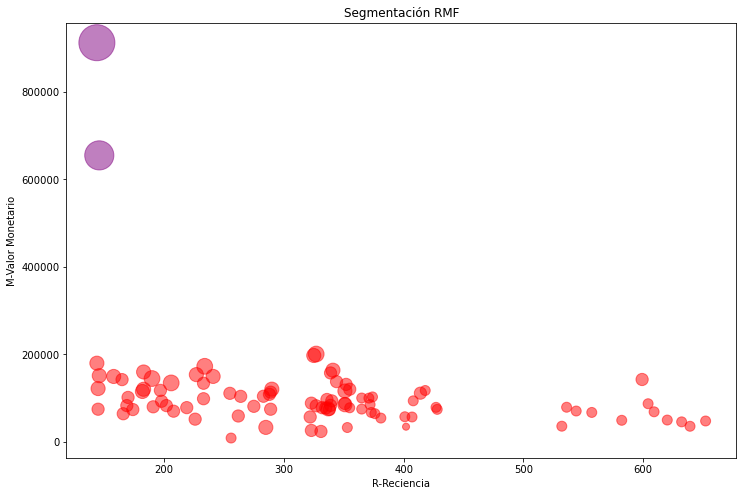

In [41]:
k=5
X = np.array(dfRFM[['FRECUENCIA','VALOR_M','RECENCIA']])
cat = np.array(dfRFM['CATEGORIA'])
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(k), colors):
    my_members = (cat == k)
    plt.scatter(X[my_members, 2], X[my_members, 1], s=X[my_members, 0]*50,  c=col, marker=u'o', alpha=0.5)

plt.xlabel("R-Reciencia")
plt.ylabel("M-Valor Monetario")
plt.title('Segmentación RMF')
plt.show()

Podemos observar que solo seasignaron los clientes en2 segmentos, se deben revisar los parametros para la clasificación

#  
# 3. Realice la segmentación por Clustering
# kmeans Clustering

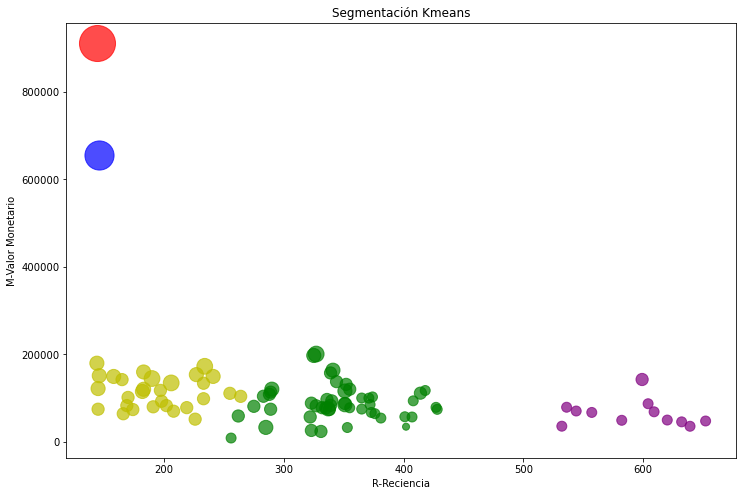

In [42]:
#Estandarizo los datos
X = StandardScaler().fit_transform(dfRFM[['FRECUENCIA','VALOR_M','RECENCIA']])
k = 5 #Decido 5 clusters para que la informacion se divida en la misma cantidad de segmentos definidos en el RMF
k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
k_means.fit(X)
X = np.array(dfRFM[['FRECUENCIA','VALOR_M','RECENCIA']]) # 'Desestandarizo' los datos para graficar 
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(k), colors):
    my_members = (k_means.labels_ == k)
    plt.scatter(X[my_members, 2], X[my_members, 1], s=X[my_members, 0]*50, c=col, marker=u'o', alpha=0.7)

plt.xlabel("R-Reciencia")
plt.ylabel("M-Valor Monetario")
plt.title('Segmentación Kmeans')
plt.show()

Con el metodo de Kmeans podemos identificar claramente los 5 segmentos, y podemos ver la relación entre los clientes en cada segmento.

Consideramos que el metodo de Kmeans clustering realizó un mejor trabajo que el metodo RFM

# 
# 4. Modelo de Sistema de Recomendación
# Collaborative filtering-item based recommendation system

In [43]:
df2 = df[['ID_Cliente','QUANTITYORDERED','SALES','PRODUCTCODE']]

In [44]:
df2.head()

,ID_Cliente,QUANTITYORDERED,SALES,PRODUCTCODE
0,C046,30,2871.00,S10_1678
1,C046,39,3896.49,S10_2016
2,C046,27,6065.55,S10_4698
3,C046,21,3036.60,S12_2823
4,C046,29,2055.23,S18_2625


In [45]:
df2.describe()

,QUANTITYORDERED,SALES
count,2823.000000,2823.000000
mean,35.092809,3553.889072
std,9.741443,1841.865106
min,6.000000,482.130000
25%,27.000000,2203.430000
50%,35.000000,3184.800000
75%,43.000000,4508.000000
max,97.000000,14082.800000


<AxesSubplot:ylabel='SALES'>

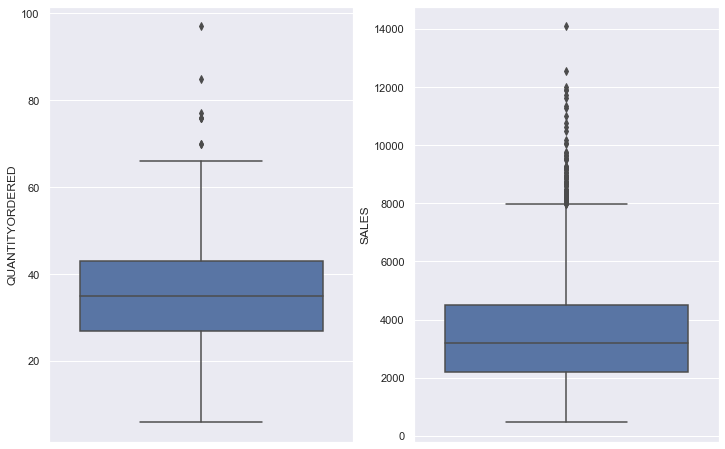

In [46]:
sns.set(rc={'figure.figsize':(12,8)})
fig, axs = plt.subplots(ncols=2)
sns.boxplot(y="QUANTITYORDERED", data=df2, ax=axs[0])
sns.boxplot(y="SALES", data=df2, ax=axs[1])

Elegimos la cantidad comprada de cada producto por cliente como parametro de evaluación

In [47]:
df2.drop('SALES',1, inplace=True)

C:\Users\CRISTIAN R\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
pivot_table = df2.pivot_table(index = ["ID_Cliente"],columns = ["PRODUCTCODE"],values = "QUANTITYORDERED")
pivot_table.head(10)

PRODUCTCODE,S10_1678,S10_1949,S10_2016,S10_4698,S10_4757,S10_4962,S12_1099,S12_1108,S12_1666,S12_2823,...,S700_2466,S700_2610,S700_2824,S700_2834,S700_3167,S700_3505,S700_3962,S700_4002,S72_1253,S72_3212
ID_Cliente,,,,,,,,,,,,,,,,,,,,,
C001,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,...,22.0,22.0,NaN,NaN,NaN,48.0,36.0,45.0,45.0,34.0
C002,NaN,34.0,NaN,NaN,NaN,NaN,NaN,46.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0
C003,NaN,24.0,NaN,NaN,NaN,36.0,30.0,NaN,44.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C004,NaN,NaN,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN
C006,37.0,30.0,38.0,47.5,NaN,27.0,NaN,NaN,29.0,NaN,...,24.0,NaN,NaN,26.5,34.5,NaN,NaN,NaN,NaN,NaN
C007,NaN,34.0,39.0,22.0,NaN,NaN,NaN,NaN,43.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C008,NaN,47.0,NaN,NaN,NaN,NaN,NaN,NaN,41.0,NaN,...,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C009,41.0,NaN,45.0,NaN,NaN,NaN,41.0,NaN,NaN,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Creamos la matriz de clientes, productos y evaluación de los productos

In [49]:
pivot_table.shape

(92, 109)

In [50]:
def recomendacion(ID_PRODUCTO):
    item_comprado = pivot_table[ID_PRODUCTO]
    cor_otros_items = pivot_table.corrwith(item_comprado)# Encuentra la correlacion del producto indicado con los otros productos
    cor_otros_items = cor_otros_items.sort_values(ascending=False)
    df = pd.merge(cor_otros_items.to_frame(),pro,on='PRODUCTCODE',how='outer')
    return df.iloc[0:4,[0,2,3]]

Definimos la función de recomendación, la cual recomienda 3 productos de acuerdo al ID de producto ingresado con base en la correlacion con los otros productos.

In [51]:
cant_productos = (df[['PRODUCTCODE','QUANTITYORDERED']].groupby('PRODUCTCODE').sum()).reset_index()
cant_productos.head()

,PRODUCTCODE,QUANTITYORDERED
0,S10_1678,944
1,S10_1949,961
2,S10_2016,928
3,S10_4698,921
4,S10_4757,952


In [52]:
p_mas_vendido = cant_productos['PRODUCTCODE'][cant_productos['QUANTITYORDERED']==cant_productos['QUANTITYORDERED'].max()]
p_menos_vendido = cant_productos['PRODUCTCODE'][cant_productos['QUANTITYORDERED']==cant_productos['QUANTITYORDERED'].min()]

##### Recomendaciones para el producto más vendido

In [53]:
recomendacion(p_mas_vendido)

,PRODUCTCODE,PRODUCTLINE,MSRP
0,S18_3232,Classic Cars,169
1,S10_1678,Motorcycles,95
2,S10_1949,Classic Cars,214
3,S10_2016,Motorcycles,118


##### Recomendaciones para el producto menos vendido

In [54]:
recomendacion(p_menos_vendido)

,PRODUCTCODE,PRODUCTLINE,MSRP
0,S18_4933,Classic Cars,71
1,S10_1678,Motorcycles,95
2,S10_1949,Classic Cars,214
3,S10_2016,Motorcycles,118
